In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import linalg, stats, special
import copy
import pickle
import random
from random import sample
import math

In [2]:
#Initialise
file1 = open('mean', 'rb')
file2 = open('covariance','rb')
file3 = open('feedback','rb')
og_mean = pickle.load(file1)
og_cov = pickle.load(file2)
feedback = pickle.load(file3)
file1.close()
file2.close()
file3.close()

"""
[0]#predicted label
[1]#iteration
[2]#precision
[3]#accuracy
[4]#recall
[5]#liked
[6]#disliked
[7]#mean
[8]#cov
[9]#data
"""

'\n[0]#predicted label\n[1]#iteration\n[2]#precision\n[3]#accuracy\n[4]#recall\n[5]#liked\n[6]#disliked\n[7]#mean\n[8]#cov\n[9]#data\n'

In [3]:
def data():
    User=[]
    precision=[]
    recall=[]
    positive=[]
    negative=[]
    for i in range(len(feedback)):
        file= open('User'+str(i), 'rb')
        pred=pickle.load(file)
        file.close()
        pred_label=pred[0] #predicted label
        user=feedback[i]
        tmp=[]
        #Storing the iter value, precision, recall, accuracy, liked and disliked images for plots.
        tmp.append(pred[1])
        tmp.append(pred[2])
        tmp.append(pred[3])
        tmp.append(pred[4])
        tmp.append(len(pred[5]))
        tmp.append(len(pred[6]))
        User.append(tmp)
        del(tmp)
        m_tt=pred[7]
        c_tt=pred[8]
        liked=[]
        disliked=[]
        for k in range(len(m_tt)):
            if pred_label[k]==1:
                for j in range(100):
                    liked.append(np.random.multivariate_normal(m_tt[k],c_tt[k]))
            if pred_label[k]==0:
                for j in range(100):
                    disliked.append(np.random.multivariate_normal(m_tt[k],c_tt[k]))
        tp=0
        fp=0
        tn=0
        fn=0
        for j in range(len(liked)):
            pdf=[]
            for k in range(len(og_mean)):
                pdf.append(sc.stats.multivariate_normal.pdf(liked[j], og_mean[k], og_cov[k]))
            index=np.argmax(pdf)
            if user[index]==1:
                tp=tp+1
            else:
                fp=fp+1
        for j in range(len(disliked)):
            pdf=[]
            for k in range(len(og_mean)):
                pdf.append(sc.stats.multivariate_normal.pdf(disliked[j], og_mean[k], og_cov[k]))
            index=np.argmax(pdf)
            if user[index]==0:
                tn=tn+1
            else:
                fn=fn+1
        tmp=[]
        tmp1=[]
        tmp.append(tp)
        tmp.append(fp)
        tmp1.append(tn)
        tmp1.append(fn)
        positive.append(tmp)
        negative.append(tmp1)
        if tp==0:
            precision.append(0)
            recall.append(0)
        else:
            precision.append(tp/(tp+fp))
            recall.append(tp/(tp+fn))
        del(tmp)
        del(tmp1)
    return User, precision, recall, positive, negative,pred

In [4]:
User, precision, recall, positive, negative,pred=data()

In [5]:
acc=[]
for i in range(50):
    p=positive[i][0]+positive[i][1]
    n=negative[i][0]+negative[i][1]
    acc.append((positive[i][0]+negative[i][0])/(p+n)*100)

In [6]:
print(acc)
print(np.mean(acc))

[67.5, 86.3125, 65.9375, 79.875, 88.66666666666667, 77.5, 74.0, 96.27777777777777, 73.0, 83.05555555555556, 89.125, 100.0, 91.05555555555556, 88.27777777777777, 77.0, 85.27777777777777, 67.27777777777779, 86.05555555555556, 89.33333333333333, 77.76470588235294, 85.4375, 88.0, 63.23529411764706, 85.38888888888889, 93.14285714285714, 80.33333333333333, 99.16666666666667, 75.6111111111111, 82.61111111111111, 69.11111111111111, 78.29411764705883, 94.94444444444444, 82.06666666666666, 91.94444444444444, 79.2, 89.61111111111111, 82.72222222222221, 77.66666666666666, 98.77777777777777, 78.55555555555556, 62.64705882352941, 75.35714285714286, 81.27777777777779, 88.44444444444444, 73.42857142857143, 78.83333333333333, 93.55555555555556, 78.94444444444444, 91.55555555555556, 85.16666666666667]
82.56647829131653


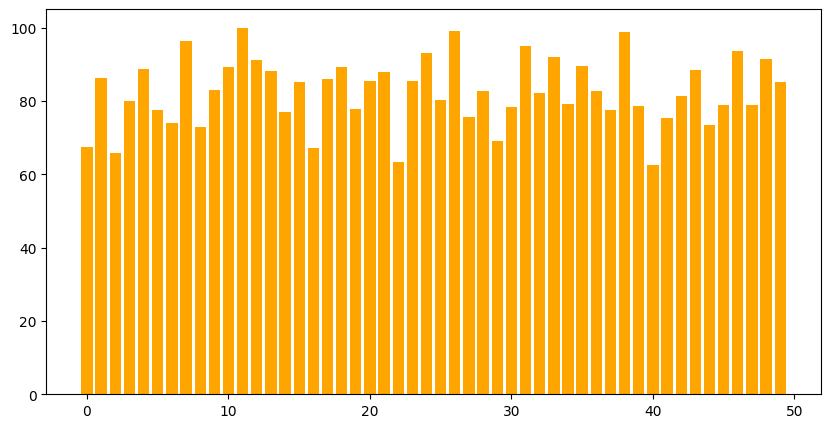

In [18]:
tmp=[]
for i in range(50):
    tmp.append(i)

fig = plt.figure(figsize = (10, 5))
k=np.arange(50)
# creating the bar plot
plt.bar(k, acc, color='orange')
 
#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Accuracy")
plt.show()

In [8]:
print(np.mean(precision))
print(np.mean(recall))

0.8209493145743147
0.715187619362093


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


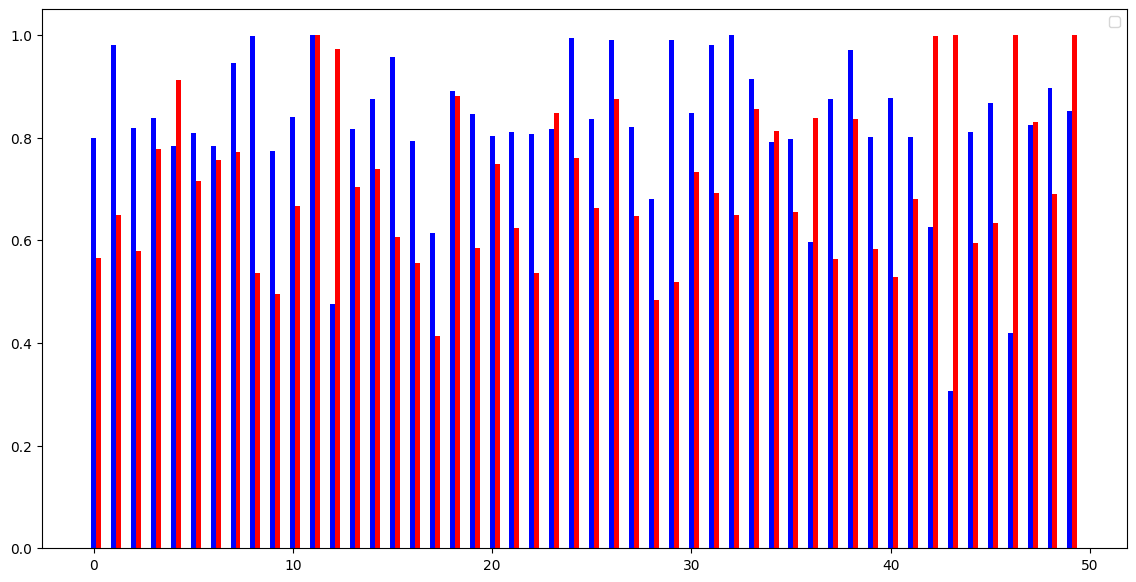

In [20]:
fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, precision, color = 'blue',
        width = width)#,label='Precision')
plt.bar(r + width, recall, color = 'red',
        width = width)#,label='Recall')
  
#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Precision and Recall")  
plt.legend()
plt.show()

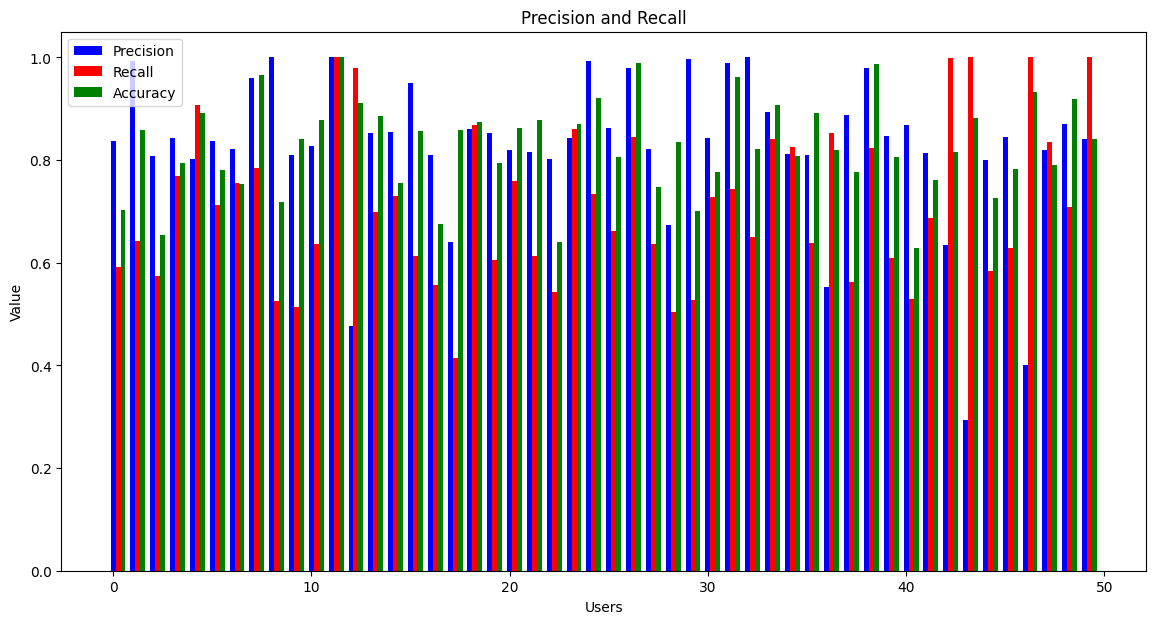

In [10]:
#Trained precision and recall
d=[]
e=[]
f=[]
for i in range(50):
    d.append(User[i][1])
    e.append(User[i][2])
    f.append(User[i][3])



fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, d, color = 'blue',
        width = width,label='Precision')
plt.bar(r + width, e, color = 'red',
        width = width,label='Recall')
plt.bar(r + 2*width, f, color = 'green',
        width = width,label='Accuracy')
  
plt.xlabel("Users")
plt.ylabel("Value")
plt.title("Precision and Recall")  
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


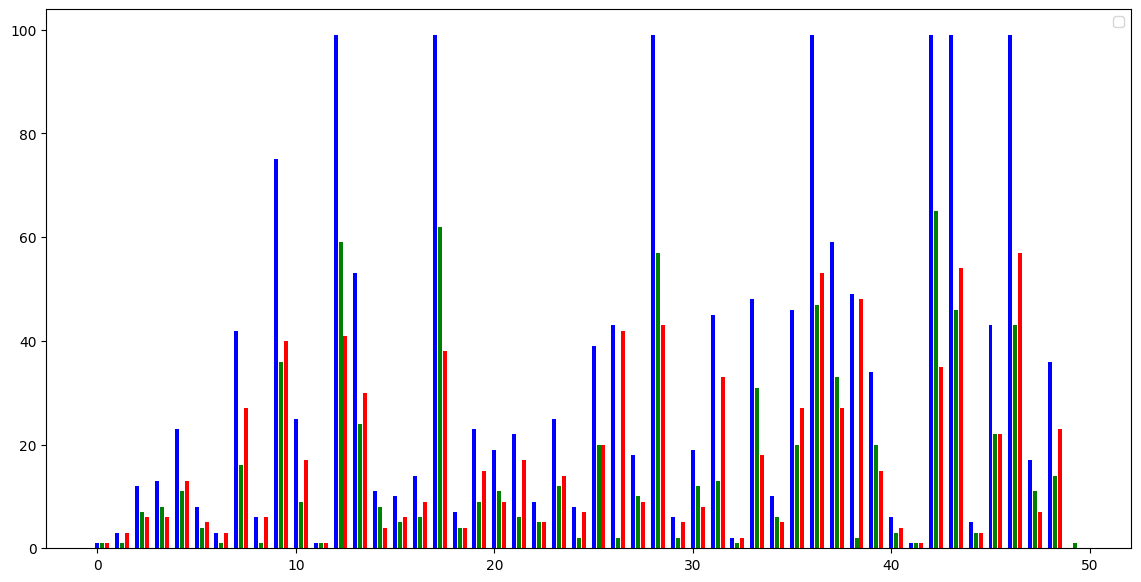

In [17]:
a=[]
b=[]
c=[]
for i in range(50):
    a.append(User[i][0])
    b.append(User[i][4])
    c.append(User[i][5])
    


fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, a, color = 'blue',
        width = 0.2)#,label='Iterations')
plt.bar(r + width, b, color = 'green',
        width = 0.2)#,label='Liked Images')
plt.bar(r + 2* width, c, color = 'red',
        width = 0.2)#,label='Disliked Images')

#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Iterations vs No. of Liked Images vs No. of Disliked Images")  
plt.legend()
plt.show()

In [12]:
file= open('User40', 'rb')
pred=pickle.load(file)
file.close()
print(len(pred))

10


In [13]:
len(pred[9])

98007

In [14]:
"""
[0]#predicted label
[1]#iteration
[2]#precision
[3]#accuracy
[4]#recall
[5]#liked
[6]#disliked
[7]#mean
[8]#cov
[9]#data
"""
m=pred[7]
c=pred[8]
data=pred[9]
cl=[]
val=[]
for j in range(len(data)):
    pdf=[]
    for k in range(len(m)):
        pdf.append(sc.stats.multivariate_normal.pdf(data[j], m[k], c[k]))
    cl.append(np.argmax(pdf))
for i in range(len(m)):
    tmp=[]
    for j in range(len(cl)):
        if cl[j]==i:
            tmp.append(data[j])
    val.append(tmp)
print(len(val))

KeyboardInterrupt: 

In [ ]:
pred[0]

In [ ]:
red=["red","firebrick","maroon","salmon","orangered","darkorange","orange","indianred","red","tomato","mistyrose","darksalmon"]
green=["olive","yellowgreen","teal","greenyellow","chartreuse","lightgreen","limegreen","green","mediumseagreen","springgreen","lime","forestgreen","seagreen"]

In [ ]:
k=0
l=0
for i in range(len(val)):
    tmp=np.array(val[i])
    if pred[0][i]==1:
        plt.scatter(tmp[:,0],tmp[:,1],color=green[k])
        k=k+1
    if pred[0][i]==0:
        plt.scatter(tmp[:,0],tmp[:,1],color=red[l])
        l=l+1
plt.show()